<center>

<img src="https://www.infnet.edu.br/infnet/wp-content/uploads/sites/18/2021/10/infnet-30-horizontal-padrao@300x-8-1024x265.png" width="60%"/>
</center>

---

# Algoritmos de Inteligência Artificial para clusterização [25E4_2]
## MIT em Inteligência Artificial, Machine Learning e Deep Learning em Data Science

---


## Análise de agrupamentos



A **análise de agrupamentos** representa um conjunto de técnicas exploratórias muito úteis e que podem ser aplicadas quando há a intenção de se verificar a existência de comportamentos semelhantes entre observações  em relação a determina das variáveis e o objetivo de se criarem grupos, ou clusters,
em que prevaleça a homogeneidade interna.

A análise de conglomerados ou análise de clusters, tem por objetivo principal a alocação de observações em uma quantidade relativamente pequena de agrupamentos homogêneos internamente e heterogêneos entre si e que representem o comportamento conjunto das observações a partir de determinadas variáveis.

A lógica a partir da qual a análise de agrupamentos pode ser elaborada, consiste em:

- Definição das medidas de distância ou de semelhança.
- Definição do esquema de aglomeração.

## Esquema de aglomeração não hierárquico k-means



Dentre os esquemas de aglomeração não hierárquicos, o procedimento k-means é o mais utilizado. Dado que a quantidade de clusters é definida preliminarmente
pelo pesquisador, esse procedimento pode ser elaborado após a aplicação de um esquema hierárquico aglomerativo quando não se tem ideia da quantidade de clusters que podem ser formados e, nessa situação, o output obtido por esse procedimento pode servir de input para o não hierárquico.

### Objetivo do k-means



Dado um conjunto de dados com $n$ amostras e $m$ variáveis, o objetivo do $K$-Means é dividir esses dados em $K$ grupos (clusters) de tal forma que:

- Os pontos dentro de um mesmo cluster sejam o mais semelhantes possível.
- Os pontos de clusters diferentes sejam o mais diferentes possível.

A similaridade é geralmente medida pela **distância Euclidiana** entre os pontos.

### Funcionamento do k-means



1. Inicialização dos centróides

  - O usuário define previamente o número $K$ de clusters desejados.
  - São escolhidos $K$ pontos iniciais (chamados de centróides) de forma aleatória dentro do espaço dos dados.

2. Atribuição dos pontos aos clusters

Para cada ponto no conjunto de dados:

  - Calcula-se a distância do ponto para cada um dos $K$ centróides.
  - O ponto é atribuído ao cluster do centróide mais próximo.

3. Atualização dos centróides

Após a atribuição de todos os pontos:

  - Os centróides são recalculados como a média aritmética dos pontos pertencentes a cada cluster.
  - Isso significa que cada novo centróide passa a ser a posição média dos pontos atribuídos a ele.

4. Repetição até a convergência
  - Os passos 2 e 3 são repetidos iterativamente até que não haja mais mudanças significativas nos centróides ou os clusters não mudem mais.
  - O critério de parada pode ser:
    - Um número máximo de iterações.
    - A variação dos centróides ser menor que um limite pré-definido.


- [Visualizando o K-Means](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/)

### Aplicação do K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("Numpy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("Seaborn version:", sns.__version__)

Numpy version: 2.0.2
Pandas version: 2.2.2
Matplotlib version: 3.10.0
Seaborn version: 0.13.2


In [3]:
uri_censo_basico_br = 'https://ftp.ibge.gov.br/Censos/Censo_Demografico_2022/Agregados_por_Setores_Censitarios/Agregados_por_Municipio_csv/Agregados_por_municipios_basico_BR_20250417.zip'

In [7]:
ibge_censo_basico_br = pd.read_csv(uri_censo_basico_br, encoding='ISO-8859-1', sep=';')
ibge_censo_basico_br.head(2)

,CD_MUN,NM_MUN,CD_REGIAO,NM_REGIAO,CD_UF,NM_UF,CD_NU,NM_NU,CD_AGLOM,NM_AGLOM,...,CD_CONCURB,NM_CONCURB,AREA_KM2,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,1100015,Alta Floresta D'Oeste,1,Norte,11,Rondônia,1100015001,Loteamento Canaã,.,NaN,...,.,NaN,"7067,1267819",21494,10081,10062,19,"2,8","0,0295",7699
1,1100023,Ariquemes,1,Norte,11,Rondônia,.,NaN,110002300015,Vila Rica,...,.,NaN,"4426,1431256",96833,44157,44114,43,"2,8","0,0438",34784


In [8]:
ibge_censo_basico_br = ibge_censo_basico_br[['CD_MUN', 'NM_MUN', 'NM_UF', 'NM_REGIAO', 'v0001', 'v0002', 'v0003', 'v0004', 'v0005', 'v0006', 'v0007']]
ibge_censo_basico_br.head(2)

,CD_MUN,NM_MUN,NM_UF,NM_REGIAO,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,1100015,Alta Floresta D'Oeste,Rondônia,Norte,21494,10081,10062,19,"2,8","0,0295",7699
1,1100023,Ariquemes,Rondônia,Norte,96833,44157,44114,43,"2,8","0,0438",34784


In [12]:
censo_basico_rj_df = ibge_censo_basico_br.query('NM_UF == "Rio de Janeiro"').reset_index(drop=True)
censo_basico_rj_df.head(2)

,CD_MUN,NM_MUN,NM_UF,NM_REGIAO,v0001,v0002,v0003,v0004,v0005,v0006,v0007
0,3300100,Angra dos Reis,Rio de Janeiro,Sudeste,167434,93974,93756,218,"2,7","0,0184",62147
1,3300159,Aperibé,Rio de Janeiro,Sudeste,11034,5358,5355,3,"2,5","0,0131",4345


In [13]:
censo_basico_rj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   CD_MUN     92 non-null     int64 
 1   NM_MUN     92 non-null     object
 2   NM_UF      92 non-null     object
 3   NM_REGIAO  92 non-null     object
 4   v0001      92 non-null     int64 
 5   v0002      92 non-null     int64 
 6   v0003      92 non-null     int64 
 7   v0004      92 non-null     int64 
 8   v0005      92 non-null     object
 9   v0006      92 non-null     object
 10  v0007      92 non-null     int64 
dtypes: int64(6), object(5)
memory usage: 8.0+ KB


In [18]:
censo_basico_rj_df['v0005'] = censo_basico_rj_df['v0005'].apply(lambda v5: float(v5.replace(',', '.')))
censo_basico_rj_df['v0006'] = censo_basico_rj_df['v0006'].apply(lambda v6: float(v6.replace(',', '.')))

In [19]:
censo_basico_rj_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CD_MUN     92 non-null     int64  
 1   NM_MUN     92 non-null     object 
 2   NM_UF      92 non-null     object 
 3   NM_REGIAO  92 non-null     object 
 4   v0001      92 non-null     int64  
 5   v0002      92 non-null     int64  
 6   v0003      92 non-null     int64  
 7   v0004      92 non-null     int64  
 8   v0005      92 non-null     float64
 9   v0006      92 non-null     float64
 10  v0007      92 non-null     int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 8.0+ KB


In [22]:
from sklearn.cluster import KMeans

In [26]:
rj_kmeans = KMeans(n_clusters=3, random_state=42).fit(censo_basico_rj_df.iloc[:, 4:])
rj_kmeans

KMeans(n_clusters=3, random_state=42)

In [29]:
censo_basico_rj_df['cluster'] = rj_kmeans.labels_
censo_basico_rj_df.head(2)

,CD_MUN,NM_MUN,NM_UF,NM_REGIAO,v0001,v0002,v0003,v0004,v0005,v0006,v0007,cluster
0,3300100,Angra dos Reis,Rio de Janeiro,Sudeste,167434,93974,93756,218,2.7,0.0184,62147,0
1,3300159,Aperibé,Rio de Janeiro,Sudeste,11034,5358,5355,3,2.5,0.0131,4345,0


In [30]:
censo_basico_rj_df['cluster'].value_counts()

,count
cluster,
0,84
2,7
1,1


In [32]:
#extensao do pandas para dados geograficos
import geopandas as gpd

<Axes: >

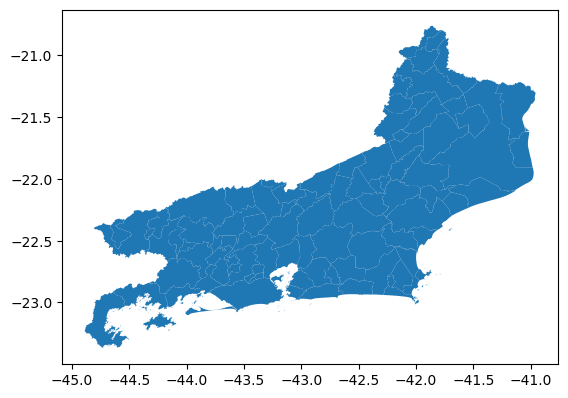

In [34]:
rj_url = 'https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2023/UFs/RJ/RJ_Municipios_2023.zip'
rj_geodf = gpd.read_file(rj_url)
rj_geodf = rj_geodf[['CD_MUN', 'geometry']]
rj_geodf['CD_MUN'] = rj_geodf['CD_MUN'].astype(int)
rj_geodf.plot()

In [36]:
df_join = pd.merge(rj_geodf, censo_basico_rj_df, on='CD_MUN', how='inner')
df_join.head(2)

,CD_MUN,geometry,NM_MUN,NM_UF,NM_REGIAO,v0001,v0002,v0003,v0004,v0005,v0006,v0007,cluster
0,3300100,"MULTIPOLYGON (((-44.51649 -23.03589, -44.51633...",Angra dos Reis,Rio de Janeiro,Sudeste,167434,93974,93756,218,2.7,0.0184,62147,0
1,3300159,"POLYGON ((-42.11437 -21.61204, -42.11394 -21.6...",Aperibé,Rio de Janeiro,Sudeste,11034,5358,5355,3,2.5,0.0131,4345,0


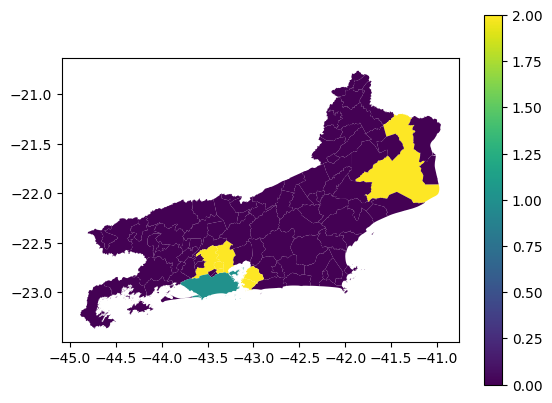

In [37]:
df_join.plot(column='cluster', legend=True);

### Vantagens e Desvantagens do K-Means

✅ Vantagens

- Simples e fácil de implementar.
- Escala bem para grandes conjuntos de dados.
- Computacionalmente eficiente $O(n⋅k⋅i)$, onde $i$ é o número de iterações.
- Funciona bem quando os clusters têm formato esférico e tamanhos semelhantes.

❌ Desvantagens

- Sensível à inicialização dos centróides.
- Depende da escolha do número de clusters $K$.
- Não lida bem com clusters de formas não esféricas ou de tamanhos diferentes.
- Sensível a outliers, que podem distorcer os centróides.

### Artigos

- K-Means Clustering and Related Algorithms
- The k-means Algorithm: A Comprehensive Survey and Performance Evaluation

In [38]:
from sklearn.datasets import make_moons

In [40]:
data, labels = make_moons(n_samples=1000, noise=0.05, random_state=42)

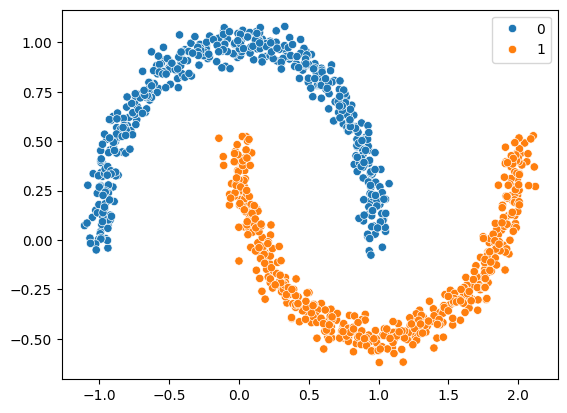

In [43]:
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels);

In [44]:
moons_df = pd.DataFrame(data, columns=['x', 'y'])
moons_df['label'] = labels
moons_df.head(2)

,x,y,label
0,-0.021371,0.406186,1
1,0.976700,-0.458323,1


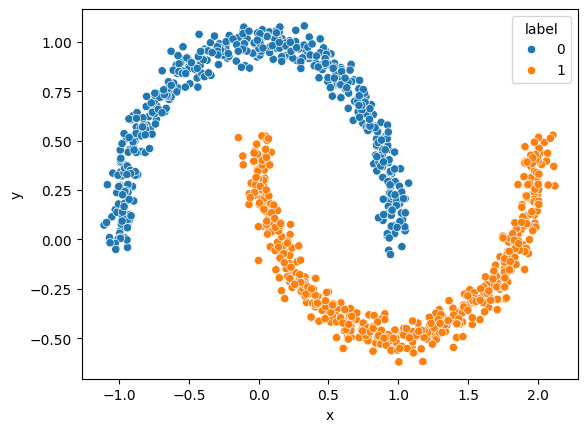

In [45]:
sns.scatterplot(data=moons_df, x='x', y='y', hue='label');

In [46]:
moons_kmeans = KMeans(n_clusters=2, random_state=42).fit(moons_df[['x', 'y']])

In [47]:
moons_df['kmeans'] = moons_kmeans.labels_
moons_df.head(2)

,x,y,label,kmeans
0,-0.021371,0.406186,1,1
1,0.976700,-0.458323,1,0


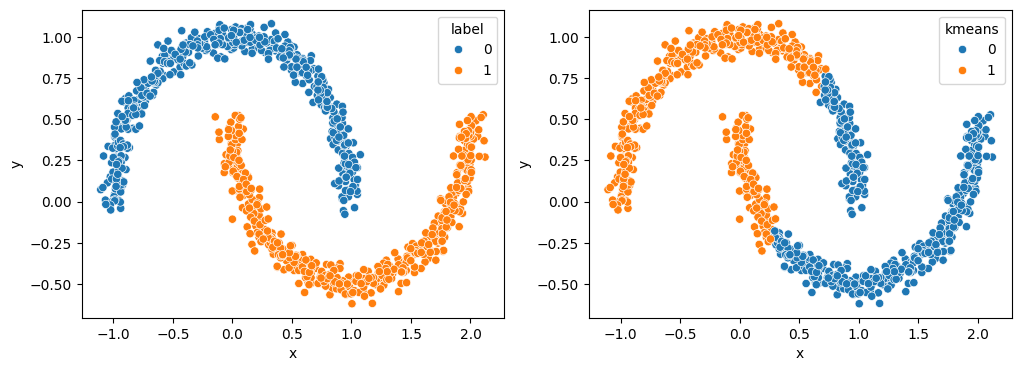

In [50]:
f, ax = plt.subplots(1, 2, figsize=(12,4))
sns.scatterplot(data=moons_df, x='x', y='y', hue='label', ax=ax[0])
sns.scatterplot(data=moons_df, x='x', y='y', hue='kmeans', ax=ax[1])
plt.show()

## Análise Hierárquicos



Os esquemas de aglomeração hierárquicos podem ser aglomerativos ou divisivos, dependendo do modo como é iniciado o processo. Caso todas as observações sejam consideradas separadas e, a partir de suas distâncias (ou semelhanças), sejam formados grupos até que se chegue a um estágio final com apenas um agrupamento,
então esse processo é conhecido como aglomerativo.

Dentre os esquemas hierárquicos aglomerativos, temos:

- Método de encadeamento do tipo único (nearest neighbor ou single linkage),
- Completo (furthest neighbor ou complete linkage),
- Médio (between groups ou average linkage).

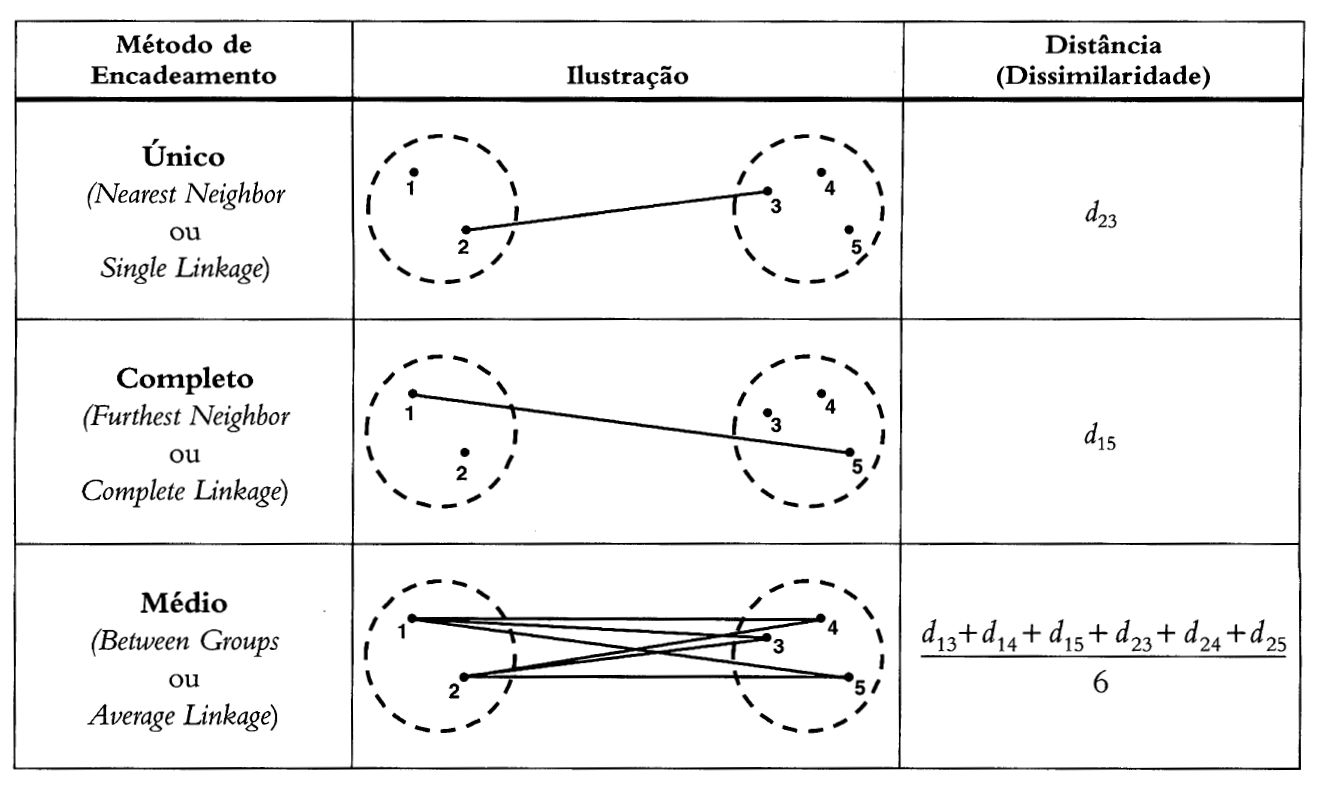

O método de encadeamento único privilegia as menores distâncias (daí vem a nomenclatura nearest neighbor) para que sejam formados novos agrupamentos a cada estágio de aglomeração pela incorporação de observações ou grupos. Nesse sentido, sua aplicação é recomendável para os casos em que as observações sejam
relativamente afastadas, isto é, diferentes, e deseja-se formar agrupamentos levando-se em consideração um núnimo de homogeneidade. Por outro lado, sua análise fica prejudicada quando da existência de observações ou agrupamentos pouco afastados entre si.


Já o método de encadeamento completo vai em direção contrária, ou seja, privilegia as maiores distâncias entre as observações ou grupos para que sejam formados novos agrupamentos (daí, a nomenclaturafurthest neighbor) e, dessa maneira, sua adoção é recomendável para os casos em que não exista considerável afastamento entre as observações e a necessidade de identificar heterogeneidades entre elas.


No método de encadeamento médio dois grupos sofrem fusão com base na distância média entre todos os pares de observações pertencentes a esses grupos (daí, a nomenclatura average línkage). Dessa forma, embora ocorram alterações no cálculo das medidas de distância entre os agrupamentos, o método de encadeamento
médio acaba por preservar a solução de ordenamento das observações em cada grupo, oferecida pelo método de encadeamento único, caso haja um considerável afastamento entre as observações.

### Exemplo prático de análise de agrupamentos com esquemas de aglomeração hierárquicos

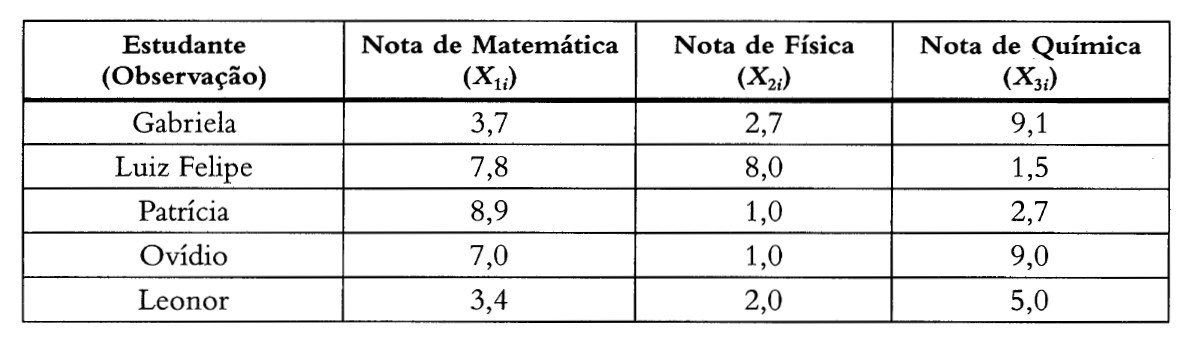